## PREPARING DATA

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_x = train[["Pclass", "Sex"]]
train_y = train[["Survived"]]

train_x.head(),train_y.head()

(   Pclass     Sex
 0       3    male
 1       1  female
 2       3  female
 3       1  female
 4       3    male,
    Survived
 0         0
 1         1
 2         1
 3         1
 4         0)

In [7]:
import warnings
warnings.filterwarnings('ignore')

train_x["Sex"].replace("male", 1, inplace = True)
train_x["Sex"].replace("female", 0, inplace = True)
train_x.head()

,Pclass,Sex
0,3,1
1,1,0
2,3,0
3,1,0
4,3,1


In [8]:
from sklearn.model_selection import train_test_split

tr_x, cv_x, tr_y, cv_y   = train_test_split(train_x, train_y, test_size = 0.30)

print(tr_x.head())
print(tr_y.head())

     Pclass  Sex
787       3    1
802       1    1
235       3    0
612       3    0
48        3    1
     Survived
787         0
802         1
235         0
612         1
48          0


## Choosing and Training a Model 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier()

In [10]:
rf.fit(tr_x, tr_y)


RandomForestClassifier()

## Evaluating a Model

In [11]:
accuracy = rf.score(cv_x, cv_y)
print("Accuracy = {}%".format(accuracy * 100))

Accuracy = 79.8507462686567%


#### Logistic Regression 

In [12]:
lgr = LogisticRegression()
lgr.fit(tr_x, tr_y)

LogisticRegression()

In [13]:
accuracy = lgr.score(cv_x, cv_y)
print("Accuracy = {}%".format(accuracy * 100))

Accuracy = 79.8507462686567%


## Prediction

In [14]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
test_x = test[["Pclass", "Sex"]]
test_x.head()

,Pclass,Sex
0,3,male
1,3,female
2,2,male
3,3,male
4,3,female


In [16]:
test_x["Sex"].replace("male", 1, inplace = True)
test_x["Sex"].replace("female", 0, inplace = True)
test_x.head()

,Pclass,Sex
0,3,1
1,3,0
2,2,1
3,3,1
4,3,0


In [17]:
prd = rf.predict(test_x)
prd

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
op = test[['PassengerId']]
op['Survived'] = prd
op

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


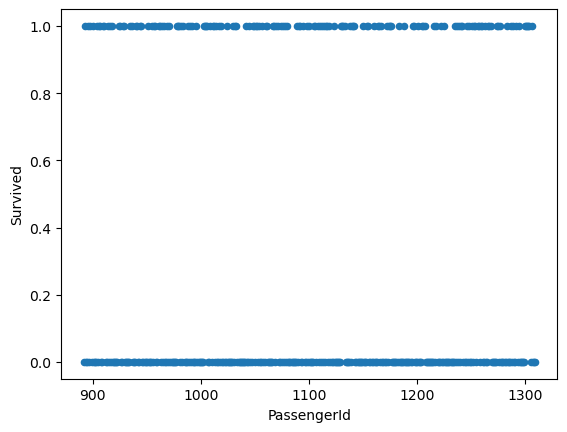

In [30]:
op.plot(x="PassengerId", y="Survived", kind="scatter");

In [20]:
op.to_csv("Survived.csv",index=False)

## -------------------------------------------------------------------------------------------